In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Namrata Patil\Desktop\BANA 698\Group1DatasetCleaned.csv")
df.head()

CountryShortName  Year  Life expectancy at birth, female (years)  \
0      Afghanistan  2008                                    61.529   
1      Afghanistan  2009                                    61.892   
2      Afghanistan  2010                                    62.408   
3      Afghanistan  2011                                    62.993   
4      Afghanistan  2012                                    63.514   

   Life expectancy at birth, male (years)  \
0                                  58.172   
1                                  58.820   
2                                  59.278   
3                                  59.825   
4                                  60.317   

   Life expectancy at birth, total (years)  Pillar 1  - Data Use - Score  \
0                                   59.852                          20.0   
1                                   60.364                          20.0   
2                                   60.851                          20.0   
3                                   61.419                          20.0   
4                                   61.923                          30.0   

   Access to clean fuels and technologies for cooking  (% of population)  \
0                                               16.6                       
1                                               18.3                       
2                                               19.9                       
3                                               21.3                       
4                                               22.9                       

   Household Survey on income, etc  (Availability score over 10 years)  \
0                                                1.0                     
1                                                1.0                     
2                                                1.0                     
3                                                1.0                     
4                                                1.0                     

   GOAL 13: Climate Action (5 year moving average)  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   Pillar 3 - Data Products - Score  ...  Region_Low income  \
0                          50.95000  ...                  0   
1                          50.20625  ...                  0   
2                          46.65625  ...                  0   
3                          47.91875  ...                  0   
4                          49.16875  ...                  0   

   Region_Lower middle income  Region_Middle East & North Africa  \
0                           0                                  0   
1                           0                                  0   
2                           0                                  0   
3                           0                                  0   
4                           0                                  0   

   Region_South Asia  Region_Sub-Saharan Africa  Region_Upper middle income  \
0                  1                          0                           0   
1                  1                          0                           0   
2                  1                          0                           0   
3                  1                          0                           0   
4                  1                          0                           0   

   Income Group_High income  Income Group_Low income  \
0                         0                        1   
1                         0                        1   
2                         0                        1   
3                         0                        1   
4                         0                        1   

   Income Group_Lower midd

# Descriptive Statistics and Trends

In [3]:
df.shape

(2886, 289)

In [4]:
df.describe()

Year  Life expectancy at birth, female (years)  \
count  2886.000000                               2886.000000   
mean   2012.443520                                 73.536763   
std       5.047514                                  8.775818   
min    2004.000000                                 43.356000   
25%    2008.000000                                 67.924750   
50%    2012.000000                                 76.010000   
75%    2017.000000                                 80.104500   
max    2021.000000                                 87.710000   

       Life expectancy at birth, male (years)  \
count                             2886.000000   
mean                                68.354383   
std                                  8.144277   
min                                 40.689000   
25%                                 62.836000   
50%                                 69.243500   
75%                                 74.473250   
max                                 82.100000   

       Life expectancy at birth, total (years)  Pillar 1  - Data Use - Score  \
count                              2886.000000                   2886.000000   
mean                                 70.889920                     55.218087   
std                                   8.374904                     26.634847   
min                                  42.125000                      0.000000   
25%                                  65.414500                     40.000000   
50%                                  72.567646                     50.000000   
75%                                  77.106750                     80.000000   
max                                  84.560000                    100.000000   

       Access to clean fuels and technologies for cooking  (% of population)  \
count                                        2886.000000                       
mean                                           10.865159                       
std                                            27.903419                       
min                                             0.000000                       
25%                                             0.670000                       
50%                                             1.000000                       
75%                                             1.000000                       
max                                           100.000000                       

       Household Survey on income, etc  (Availability score over 10 years)  \
count                                        2886.000000                     
mean                                            0.637195                     
std                                             0.428154                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             1.000000                     
75%                                             1.000000                     
max                                             1.000000                     

       GOAL 13: Climate Action (5 year moving average)  \
count                                      2886.000000   
mean                                         52.082447   
std                                          22.374022   
min                                           0.000000   
25%                                          46.667187   
50%                                          56.503125   
75%                                          66.793750   
max                                          94.187500   

       Pillar 3 - Data Products - Score  \
count                       2886.000000   
mean                           8.300004   
std                           20.852018   
min                            0.000000   
25%                            0.400000   
50%                            0.500000   
75%                       

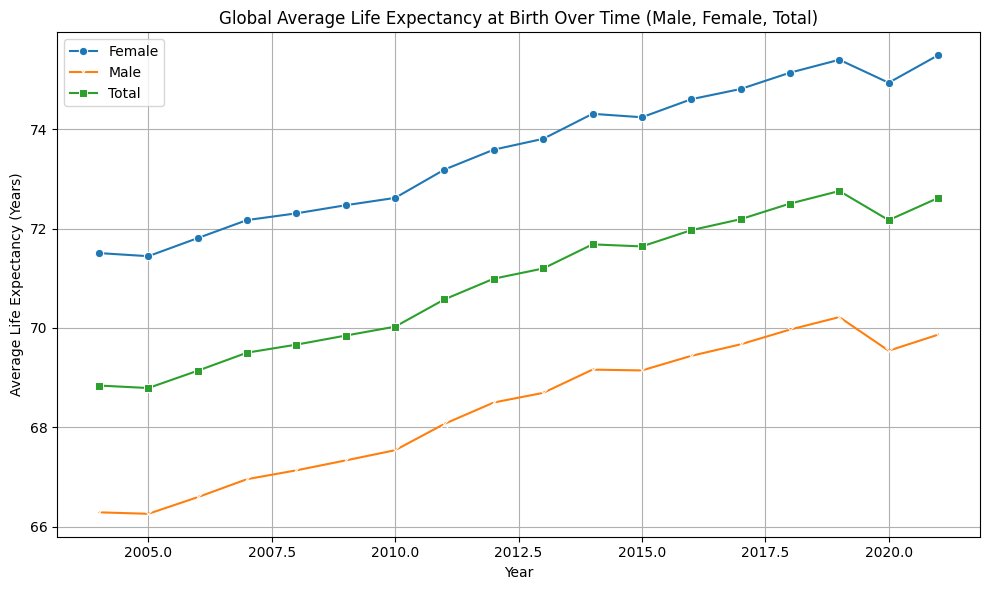

In [5]:
yearly_life_expectancy = df.groupby("Year")[[
    "Life expectancy at birth, female (years)",
    "Life expectancy at birth, male (years)",
    "Life expectancy at birth, total (years)"
]].mean().reset_index()

# Plotting the trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_life_expectancy, x="Year", y="Life expectancy at birth, female (years)", marker="o", label="Female")
sns.lineplot(data=yearly_life_expectancy, x="Year", y="Life expectancy at birth, male (years)", marker="x", label="Male")
sns.lineplot(data=yearly_life_expectancy, x="Year", y="Life expectancy at birth, total (years)", marker="s", label="Total")

plt.title("Global Average Life Expectancy at Birth Over Time (Male, Female, Total)")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy (Years)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

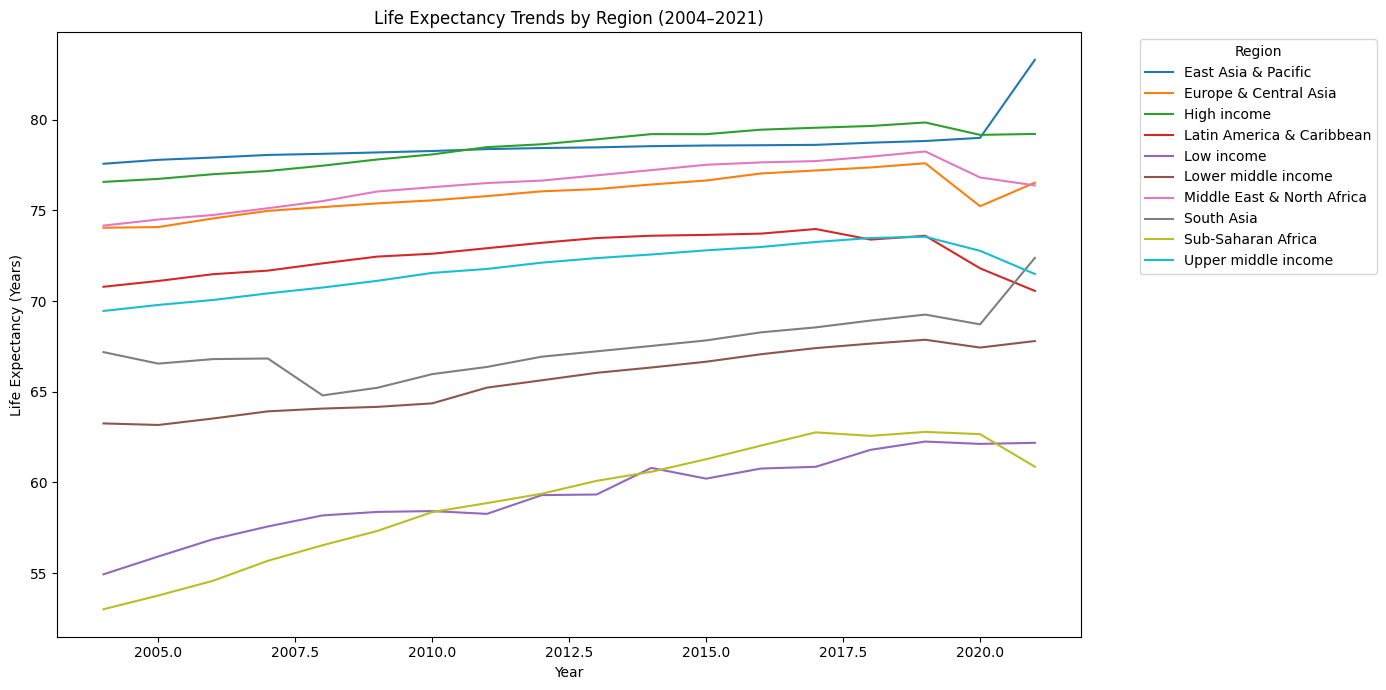

In [6]:
region_columns = [col for col in df.columns if col.startswith("Region_")]

# Melt the dataframe to long format to make it easier to group by region
df_regions = df.copy()
df_regions = df_regions.melt(id_vars=['Year', 'Life expectancy at birth, total (years)'],
                             value_vars=region_columns,
                             var_name='Region', value_name='is_region')

# Filter only rows where the region is active (is_region == 1)
df_regions = df_regions[df_regions['is_region'] == 1]

# Clean region names
df_regions['Region'] = df_regions['Region'].str.replace('Region_', '')

# Group by Year and Region to get mean life expectancy
region_life_expectancy = df_regions.groupby(['Year', 'Region'])[
    'Life expectancy at birth, total (years)'
].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=region_life_expectancy, x='Year', y='Life expectancy at birth, total (years)', hue='Region')
plt.title("Life Expectancy Trends by Region (2004–2021)")
plt.ylabel("Life Expectancy (Years)")
plt.xlabel("Year")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

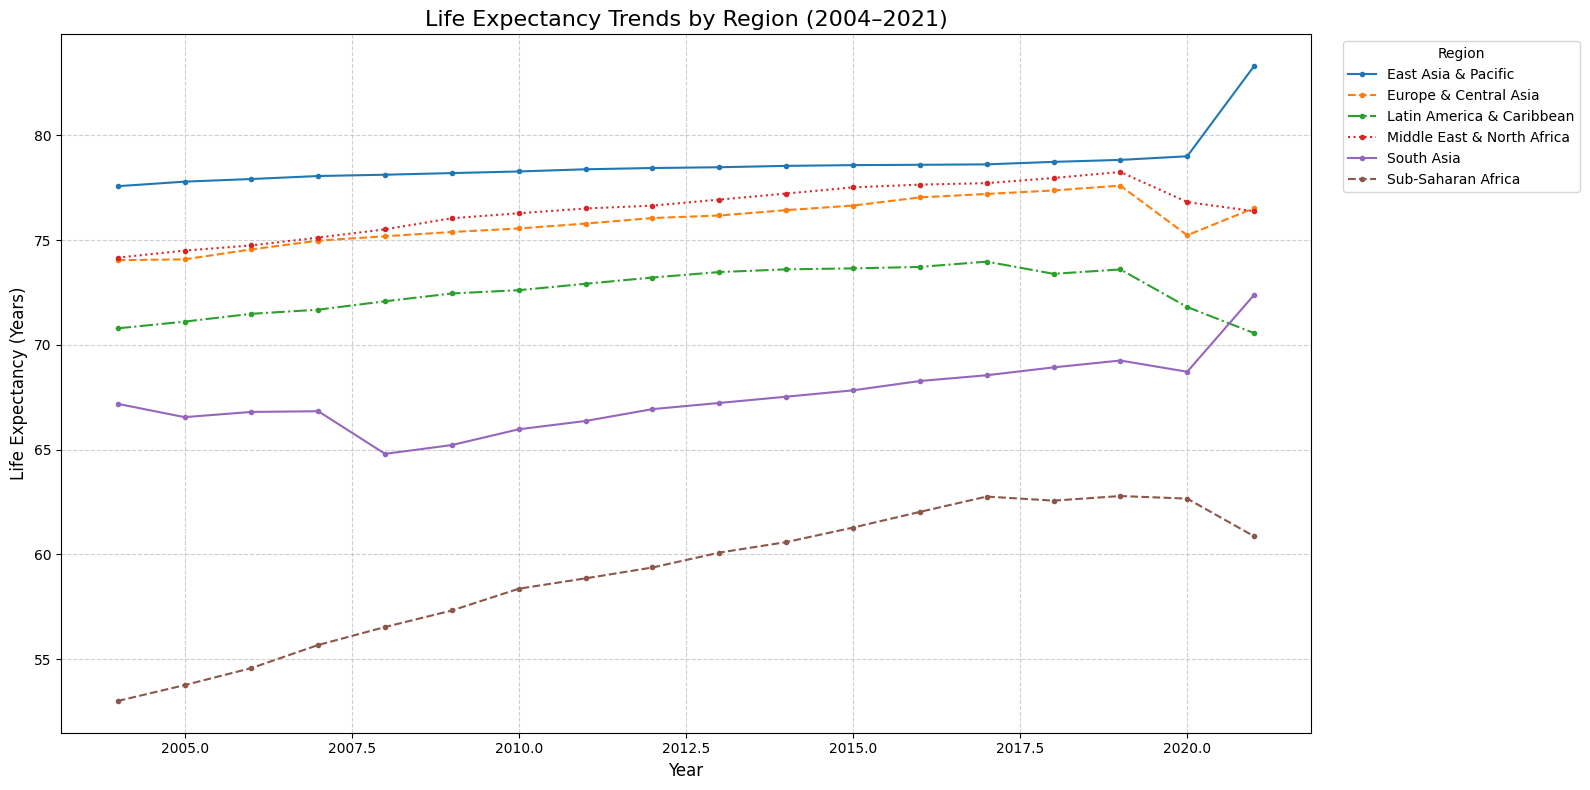

In [7]:
# Step 1: Identify and melt region columns
region_columns = [col for col in df.columns if col.startswith("Region_")]

df_regions = df.copy()
df_regions = df_regions.melt(id_vars=['Year', 'Life expectancy at birth, total (years)'],
                             value_vars=region_columns,
                             var_name='Region', value_name='is_region')

# Step 2: Filter rows where region is active
df_regions = df_regions[df_regions['is_region'] == 1]

# Step 3: Clean region names
df_regions['Region'] = df_regions['Region'].str.replace('Region_', '')

# Step 4: Remove income-based regions
income_regions = ['High income', 'Low income', 'Upper middle income', 'Lower middle income']
df_regions = df_regions[~df_regions['Region'].isin(income_regions)]

# Step 5: Group data
region_life_expectancy = df_regions.groupby(['Year', 'Region'])[
    'Life expectancy at birth, total (years)'
].mean().reset_index()

# Step 6: Plotting
region_order = sorted(region_life_expectancy['Region'].unique())
palette = sns.color_palette("tab10") + sns.color_palette("Set2")
linestyles = ['-', '--', '-.', ':'] * 4

plt.figure(figsize=(16, 8))
for i, region in enumerate(region_order):
    region_data = region_life_expectancy[region_life_expectancy['Region'] == region]
    plt.plot(region_data['Year'],
             region_data['Life expectancy at birth, total (years)'],
             label=region,
             linestyle=linestyles[i % len(linestyles)],
             color=palette[i % len(palette)],
             marker='o', markersize=3)

# Step 7: Final touches
plt.title("Life Expectancy Trends by Region (2004–2021)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Life Expectancy (Years)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Region", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

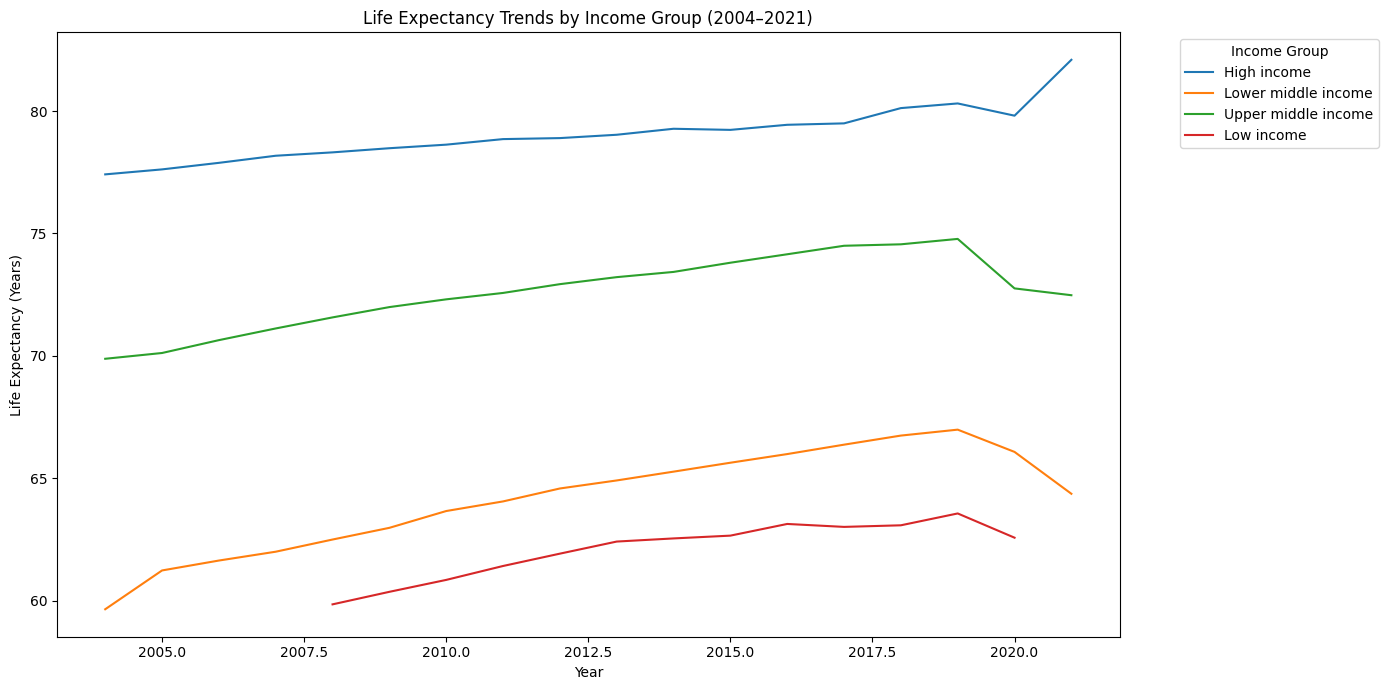

In [8]:
income_columns = [col for col in df.columns if col.startswith("Income Group_")]

# Melt the dataframe to long format to make it easier to group by income group
df_income = df.copy()
df_income = df_income.melt(id_vars=['Year', 'Life expectancy at birth, total (years)'],
                           value_vars=income_columns,
                           var_name='Income Group', value_name='is_group')

# Filter only rows where the income group is active (is_group == 1)
df_income = df_income[df_income['is_group'] == 1]

# Clean income group names
df_income['Income Group'] = df_income['Income Group'].str.replace('Income Group_', '')

# Group by Year and Income Group to get mean life expectancy
income_life_expectancy = df_income.groupby(['Year', 'Income Group'])[
    'Life expectancy at birth, total (years)'
].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.lineplot(data=income_life_expectancy, x='Year', y='Life expectancy at birth, total (years)', hue='Income Group')
plt.title("Life Expectancy Trends by Income Group (2004–2021)")
plt.ylabel("Life Expectancy (Years)")
plt.xlabel("Year")
plt.legend(title="Income Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

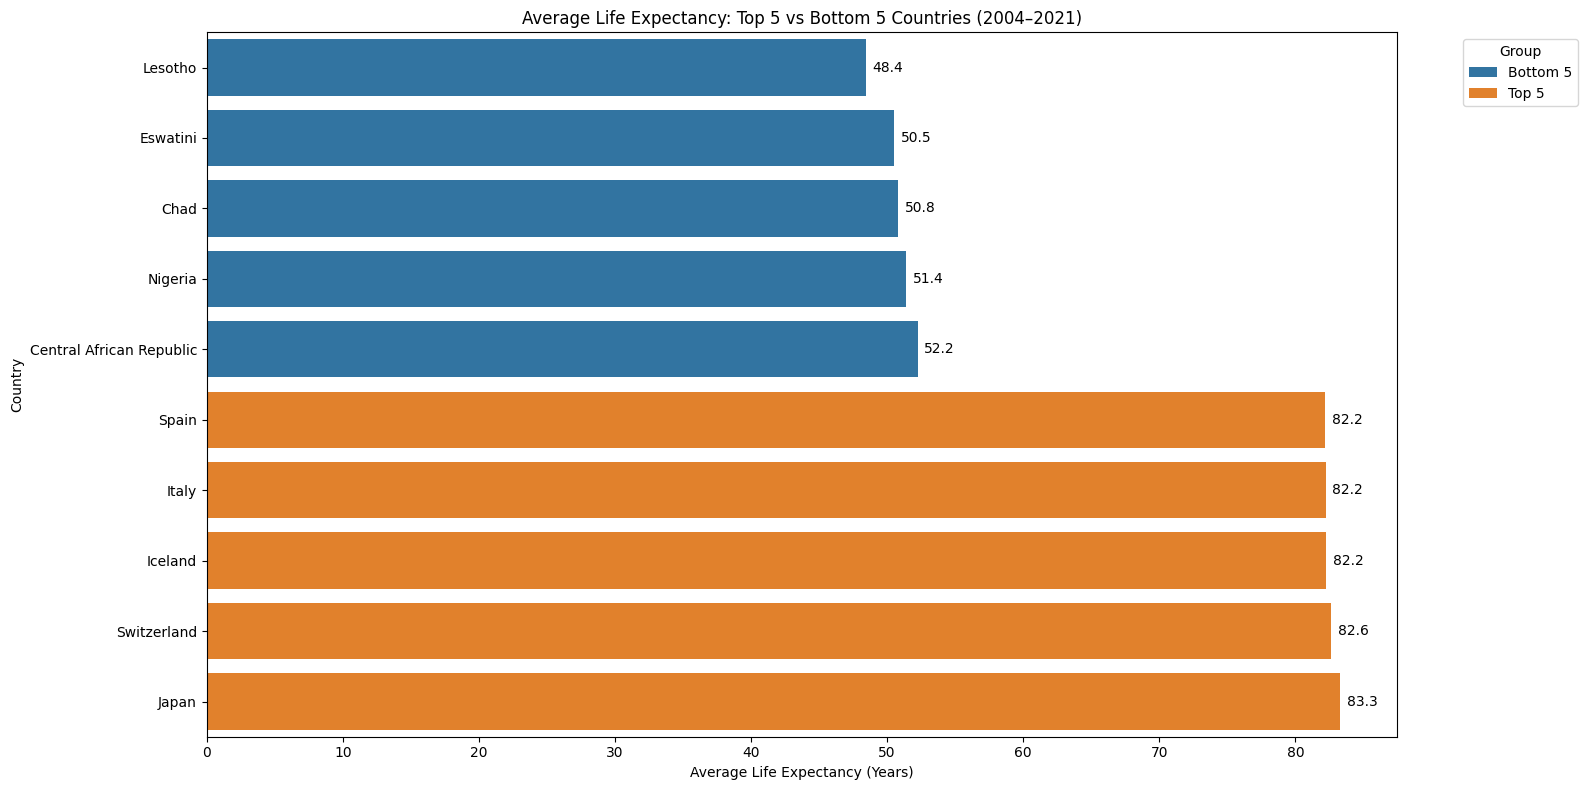

In [9]:
# Calculate average life expectancy by country
avg_life_expectancy_by_country = df.groupby('CountryShortName')[
    'Life expectancy at birth, total (years)'
].mean().sort_values()

# Get bottom and top 5 countries
bottom_5_countries = avg_life_expectancy_by_country.head(5).index.tolist()
top_5_countries = avg_life_expectancy_by_country.tail(5).index.tolist()

# Combine top and bottom countries
selected_countries = bottom_5_countries + top_5_countries

# Create dataframe for bar chart
avg_life_exp_top_bottom = avg_life_expectancy_by_country.loc[selected_countries].reset_index()
avg_life_exp_top_bottom.columns = ['Country', 'Average Life Expectancy']
avg_life_exp_top_bottom['Group'] = ['Bottom 5'] * 5 + ['Top 5'] * 5

# Plotting
plt.figure(figsize=(16, 8))
barplot = sns.barplot(
    data=avg_life_exp_top_bottom,
    x='Average Life Expectancy',
    y='Country',
    hue='Group',
    dodge=False
)

# Add value labels beside the bars
for index, row in avg_life_exp_top_bottom.iterrows():
    barplot.text(
        row['Average Life Expectancy'] + 0.5,  # slight offset to the right
        index,
        f"{row['Average Life Expectancy']:.1f}",
        color='black',
        va='center'
    )

plt.title("Average Life Expectancy: Top 5 vs Bottom 5 Countries (2004–2021)")
plt.xlabel("Average Life Expectancy (Years)")
plt.ylabel("Country")
plt.legend(title="Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

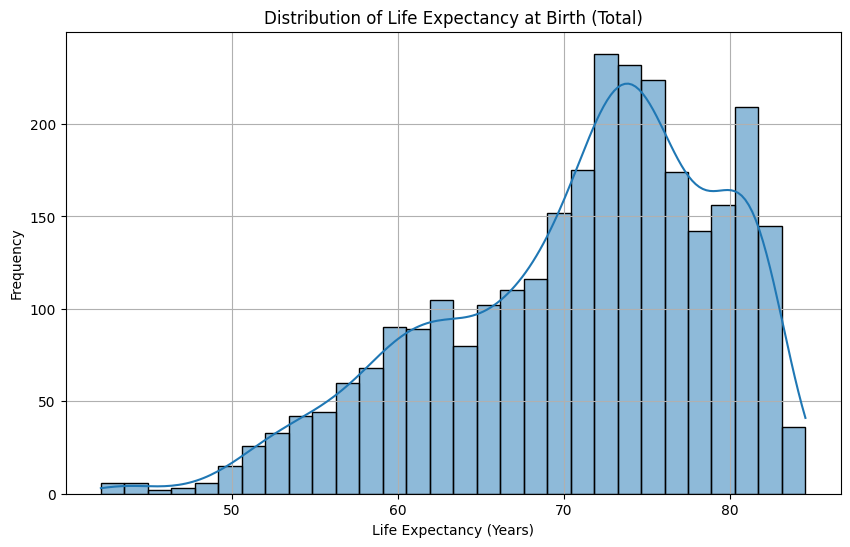

In [10]:
# Plotting the distribution of life expectancy (total)
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy at birth, total (years)'], kde=True, bins=30)
plt.title('Distribution of Life Expectancy at Birth (Total)')
plt.xlabel('Life Expectancy (Years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

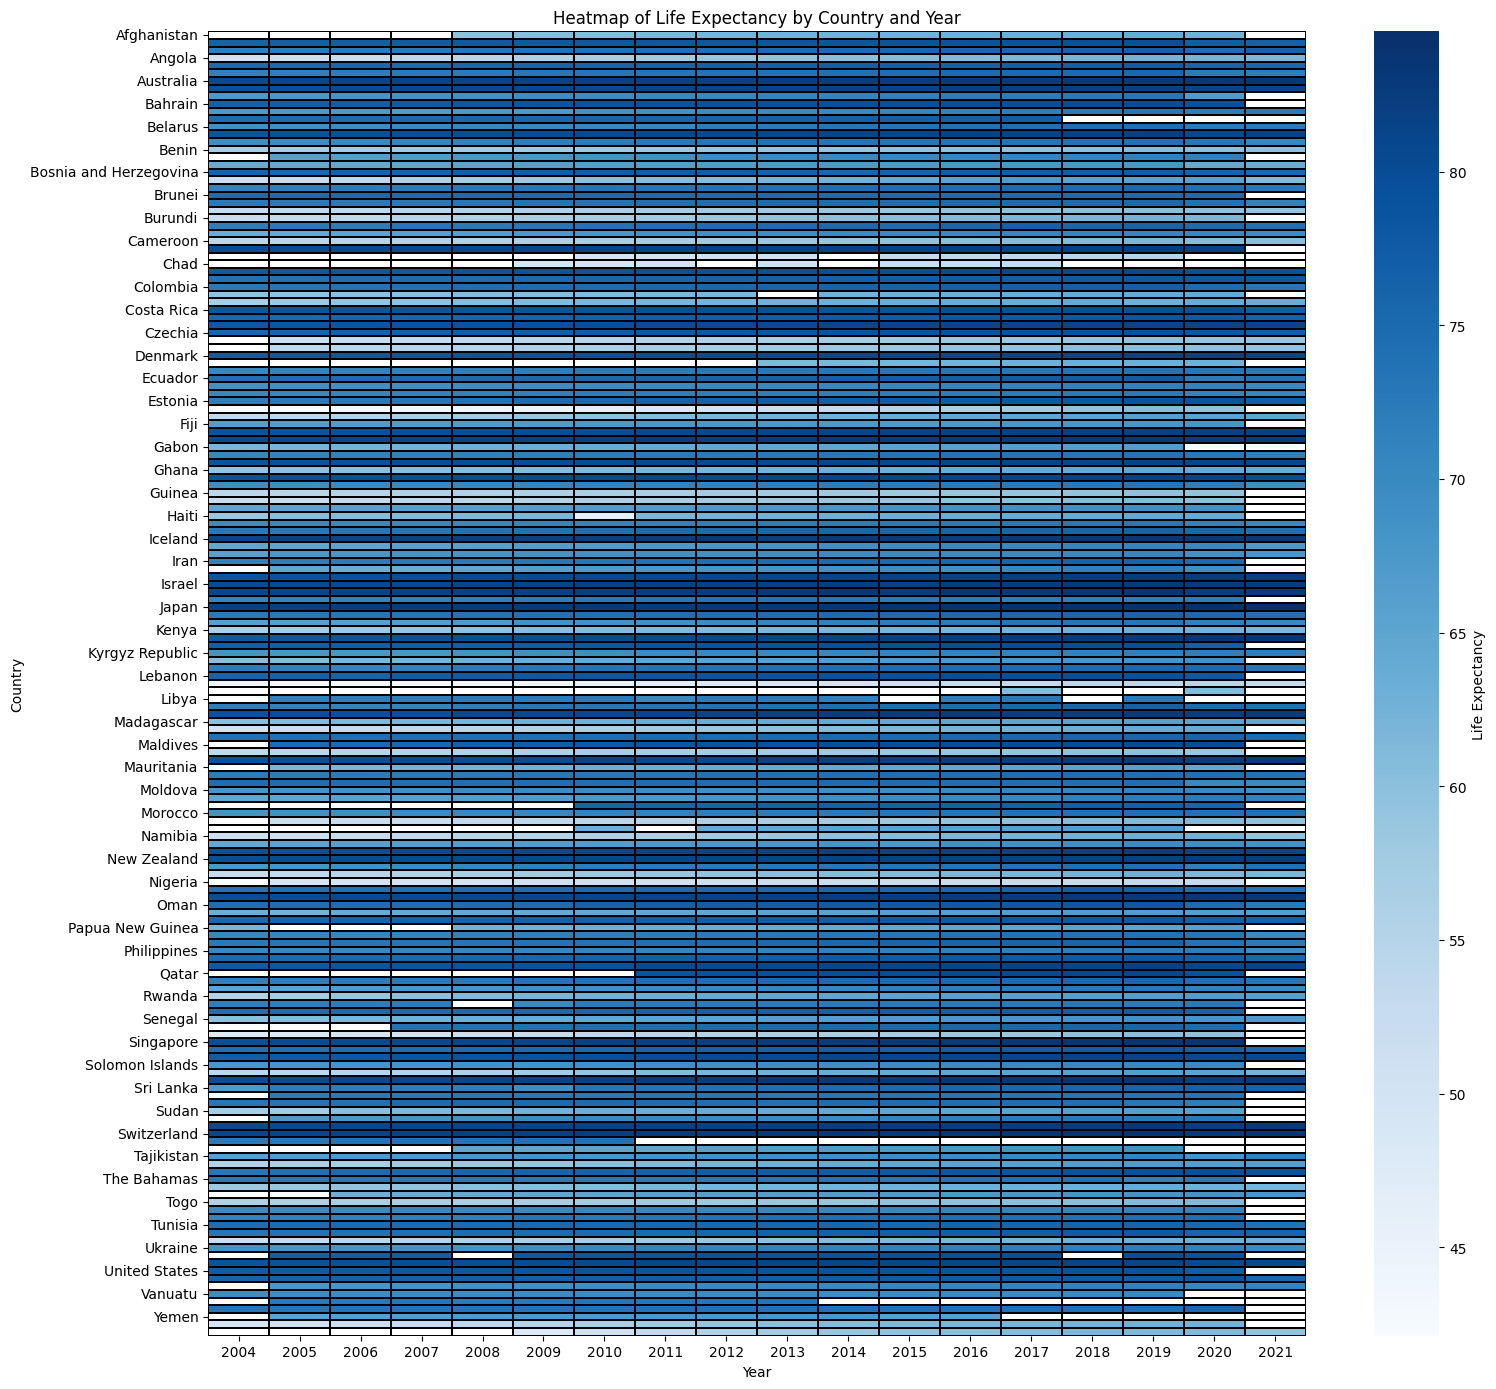

In [11]:
# Pivot the data to create a heatmap-friendly format (rows = countries, columns = years)
heatmap_data = df.pivot_table(index='CountryShortName', columns='Year',
                              values='Life expectancy at birth, total (years)')

# Plotting the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.1, linecolor='black', cbar_kws={'label': 'Life Expectancy'})
plt.title("Heatmap of Life Expectancy by Country and Year")
plt.xlabel("Year")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

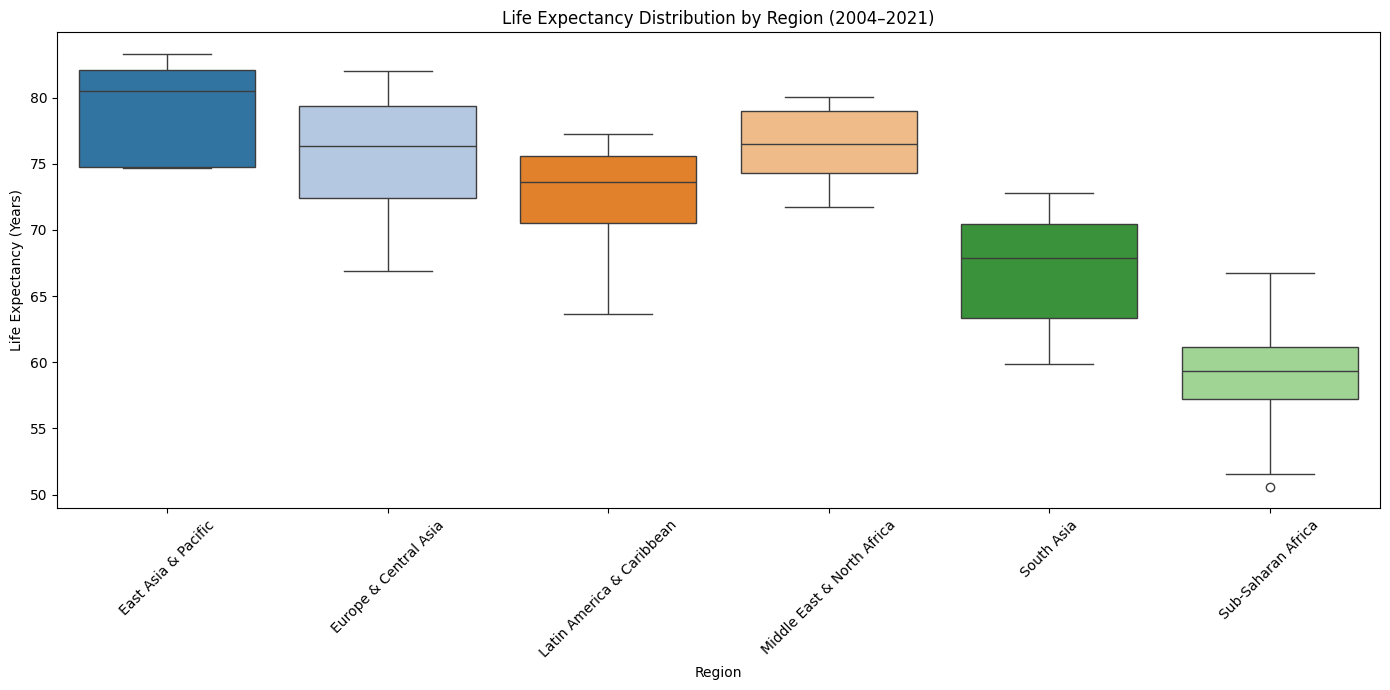

In [12]:
# Reuse the earlier melted region data
df_regions_box = df.copy()
region_columns = [col for col in df.columns if col.startswith("Region_")]

df_regions_box = df_regions_box.melt(
    id_vars=['Year', 'Life expectancy at birth, total (years)'],
    value_vars=region_columns,
    var_name='Region',
    value_name='is_region'
)

# Filter only active region rows
df_regions_box = df_regions_box[df_regions_box['is_region'] == 1]
df_regions_box['Region'] = df_regions_box['Region'].str.replace('Region_', '')

# Step 4: Remove income-based regions
income_regions = ['High income', 'Low income', 'Upper middle income', 'Lower middle income']
df_regions_box = df_regions_box[~df_regions_box['Region'].isin(income_regions)]

# Plotting boxplots for life expectancy by region
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_regions_box, x='Region', y='Life expectancy at birth, total (years)', palette='tab20',hue='Region')
plt.title("Life Expectancy Distribution by Region (2004–2021)")
plt.ylabel("Life Expectancy (Years)")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Change in Life Expectancy
Calculate and plot yearly change (delta) in life expectancy to spot jumps or declines.

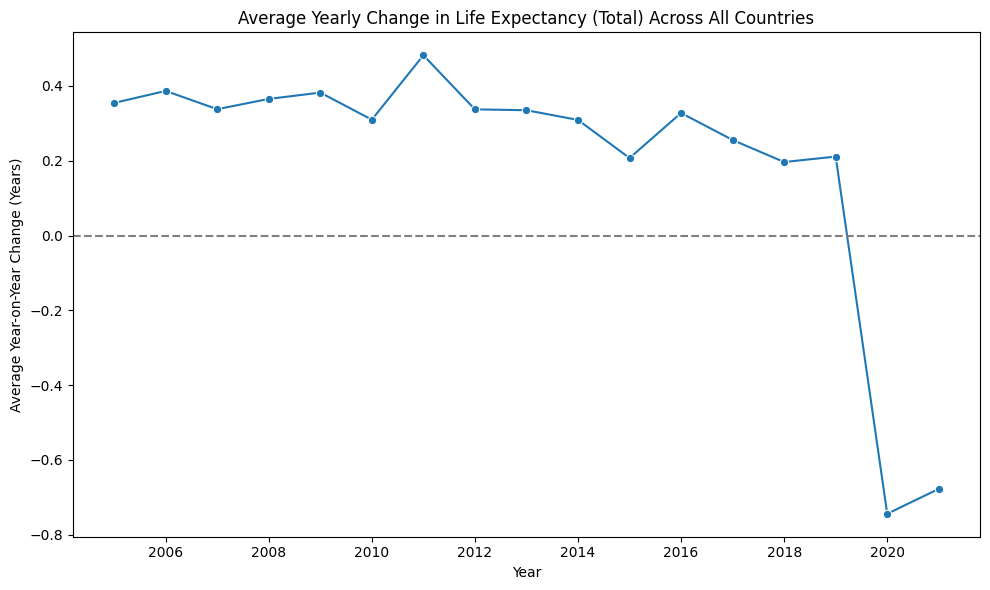

In [13]:
# Sort the dataframe by Country and Year for proper difference calculation
df_sorted = df.sort_values(by=['CountryShortName', 'Year'])

# Calculate yearly delta in life expectancy (total) by country
df_sorted['Life Expectancy Change'] = df_sorted.groupby('CountryShortName')[
    'Life expectancy at birth, total (years)'
].diff()

# Group by year and calculate average change across all countries
yearly_change = df_sorted.groupby('Year')['Life Expectancy Change'].mean().reset_index()

# Plotting the average yearly change
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_change, x='Year', y='Life Expectancy Change', marker='o')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Average Yearly Change in Life Expectancy (Total) Across All Countries")
plt.ylabel("Average Year-on-Year Change (Years)")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

In [14]:
# Recalculate the income_yearly_change
df_income_change = df.copy()
df_income_change = df_income_change.melt(
    id_vars=['CountryShortName', 'Year', 'Life expectancy at birth, total (years)'],
    value_vars=income_columns,
    var_name='Income Group',
    value_name='is_group'
)

df_income_change = df_income_change[df_income_change['is_group'] == 1]
df_income_change['Life Expectancy Change'] = df_income_change.groupby('CountryShortName')[
    'Life expectancy at birth, total (years)'
].diff()

# Group by year and income group to get average yearly change
income_yearly_change = df_income_change.groupby(['Year', 'Income Group'])[
    'Life Expectancy Change'
].mean().reset_index()

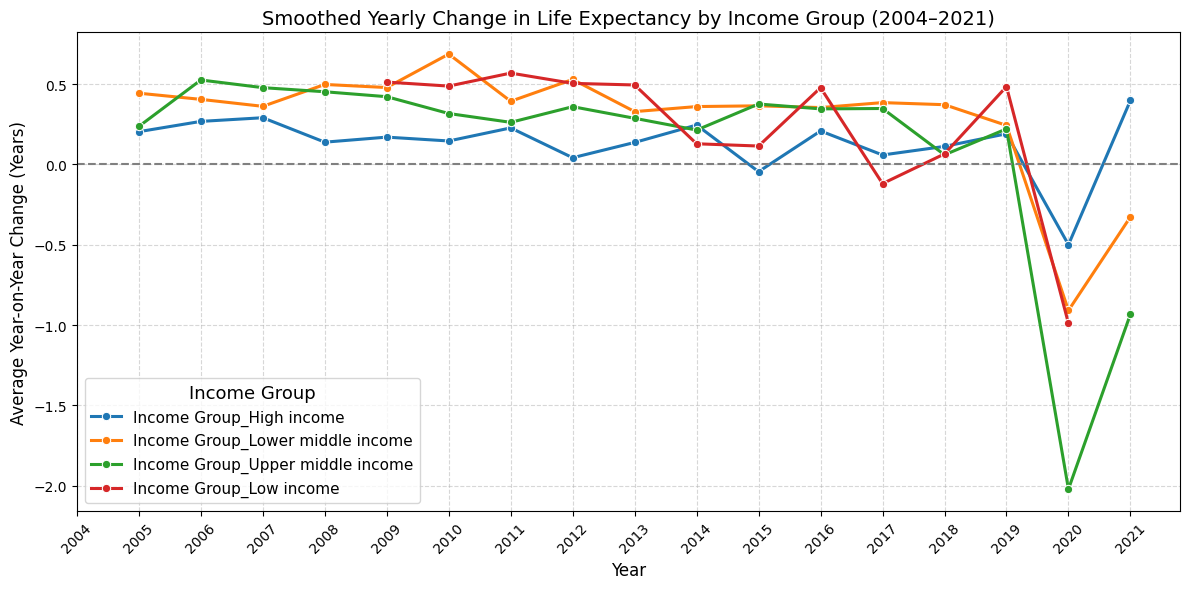

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=income_yearly_change,
    x='Year',
    y='Life Expectancy Change',
    hue='Income Group',
    marker='o',
    linewidth=2.2
)

# Add horizontal line for reference
plt.axhline(0, color='gray', linestyle='--')


plt.title("Smoothed Yearly Change in Life Expectancy by Income Group (2004–2021)", fontsize=14)
plt.ylabel("Average Year-on-Year Change (Years)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.xticks(income_yearly_change['Year'].unique(), rotation=45)
plt.legend(title="Income Group", title_fontsize='13', fontsize='11')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

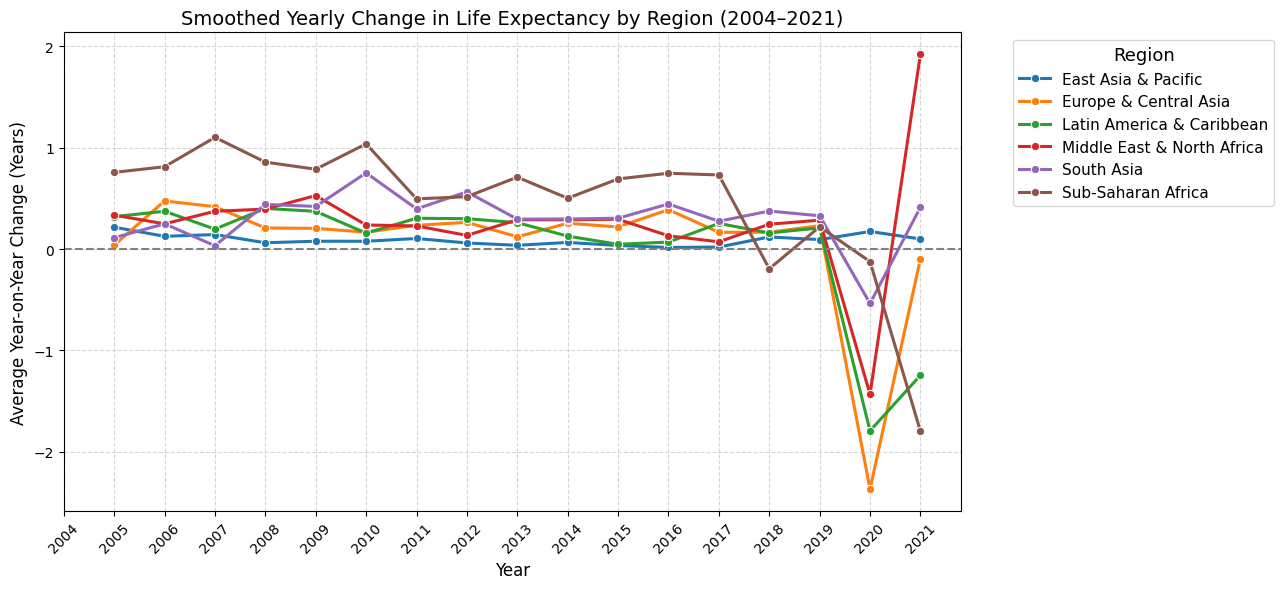

In [16]:
# Identify region columns
region_columns = [col for col in df.columns if col.startswith("Region_")]

# Melt data for region-wise analysis
df_region_change = df.copy()
df_region_change = df_region_change.melt(
    id_vars=['CountryShortName', 'Year', 'Life expectancy at birth, total (years)'],
    value_vars=region_columns,
    var_name='Region',
    value_name='is_region'
)

# Filter only active region rows
df_region_change = df_region_change[df_region_change['is_region'] == 1]
df_region_change['Region'] = df_region_change['Region'].str.replace('Region_', '')

# Exclude income-based region categories
income_like_regions = ['High income', 'Low income', 'Upper middle income', 'Lower middle income']
df_region_change = df_region_change[~df_region_change['Region'].isin(income_like_regions)]

# Sort and compute life expectancy change by country
df_region_change = df_region_change.sort_values(by=['CountryShortName', 'Year'])
df_region_change['Life Expectancy Change'] = df_region_change.groupby('CountryShortName')[
    'Life expectancy at birth, total (years)'
].diff()

# Group by year and region to compute average change
region_yearly_change = df_region_change.groupby(['Year', 'Region'])[
    'Life Expectancy Change'
].mean().reset_index()

# Plotting the smoothed region-wise line plot
plt.figure(figsize=(13, 6))
sns.lineplot(
    data=region_yearly_change,
    x='Year',
    y='Life Expectancy Change',
    hue='Region',
    marker='o',
    linewidth=2.2
)

# Reference line at zero
plt.axhline(0, color='gray', linestyle='--')

# Customizing the plot
plt.title("Smoothed Yearly Change in Life Expectancy by Region (2004–2021)", fontsize=14)
plt.ylabel("Average Year-on-Year Change (Years)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.xticks(region_yearly_change['Year'].unique(), rotation=45)
plt.legend(title="Region", title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

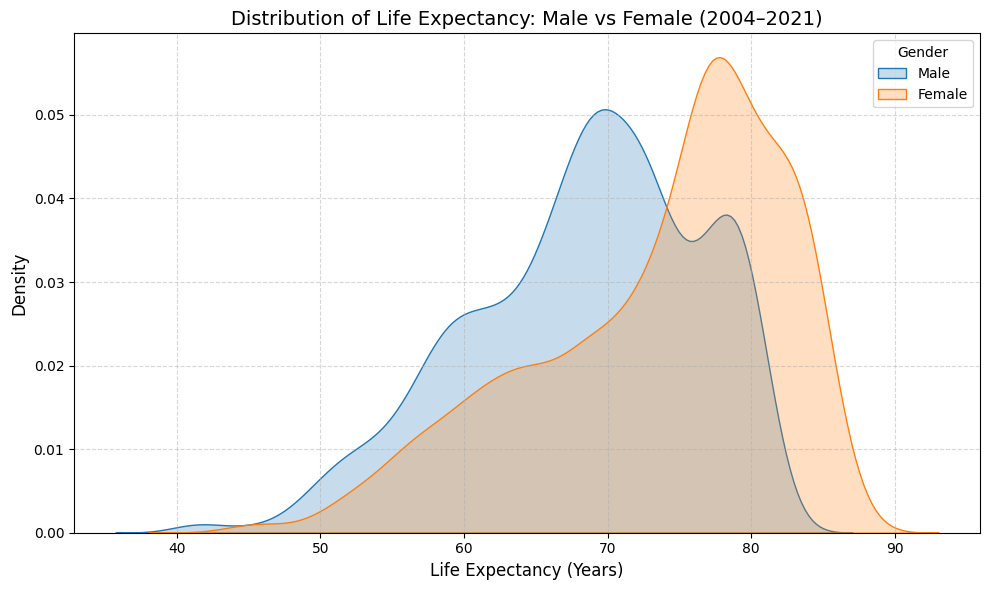

In [17]:
# Plotting KDE distribution for female vs male life expectancy
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Life expectancy at birth, male (years)'], label='Male', fill=True)
sns.kdeplot(df['Life expectancy at birth, female (years)'], label='Female', fill=True)

plt.title("Distribution of Life Expectancy: Male vs Female (2004–2021)", fontsize=14)
plt.xlabel("Life Expectancy (Years)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Gender")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

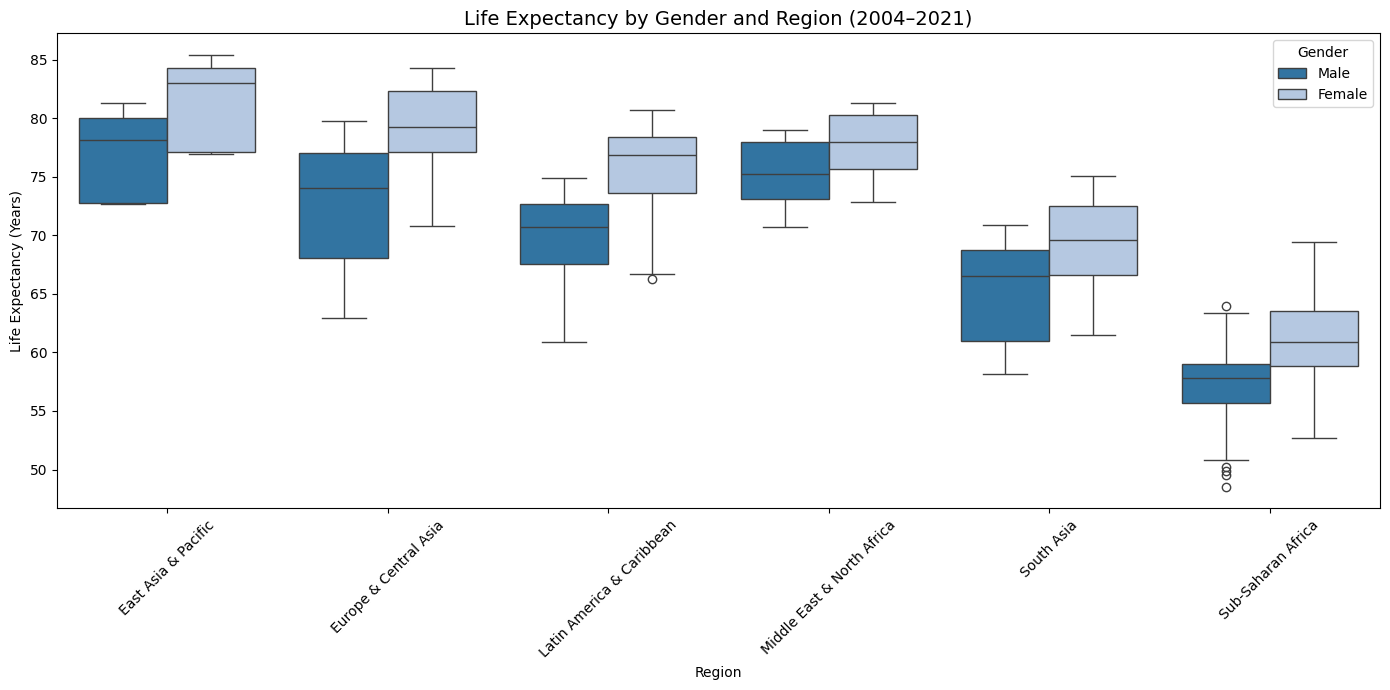

In [18]:
# Melt male and female life expectancy columns into long format
df_gender_box = pd.melt(
    df,
    id_vars=[col for col in df.columns if col.startswith('Region_')] + ['Year'],
    value_vars=['Life expectancy at birth, male (years)', 'Life expectancy at birth, female (years)'],
    var_name='Gender',
    value_name='Life Expectancy'
)

# Extract gender labels
df_gender_box['Gender'] = df_gender_box['Gender'].str.extract(r'\b(male|female)\b', expand=False).str.title()

# Melt the region columns to identify region names
df_gender_box = df_gender_box.melt(
    id_vars=['Year', 'Gender', 'Life Expectancy'],
    value_vars=[col for col in df.columns if col.startswith('Region_')],
    var_name='Region',
    value_name='is_region'
)

# Keep only active region rows
df_gender_box = df_gender_box[df_gender_box['is_region'] == 1]
df_gender_box['Region'] = df_gender_box['Region'].str.replace('Region_', '')

# Remove rows where Region is income-based
income_like_regions = ['High income', 'Low income', 'Upper middle income', 'Lower middle income']
df_gender_box = df_gender_box[~df_gender_box['Region'].isin(income_like_regions)]

# Plot side-by-side boxplots of life expectancy by region and gender
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_gender_box, x='Region', y='Life Expectancy', hue='Gender', palette='tab20')
plt.title("Life Expectancy by Gender and Region (2004–2021)", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Life Expectancy (Years)")
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

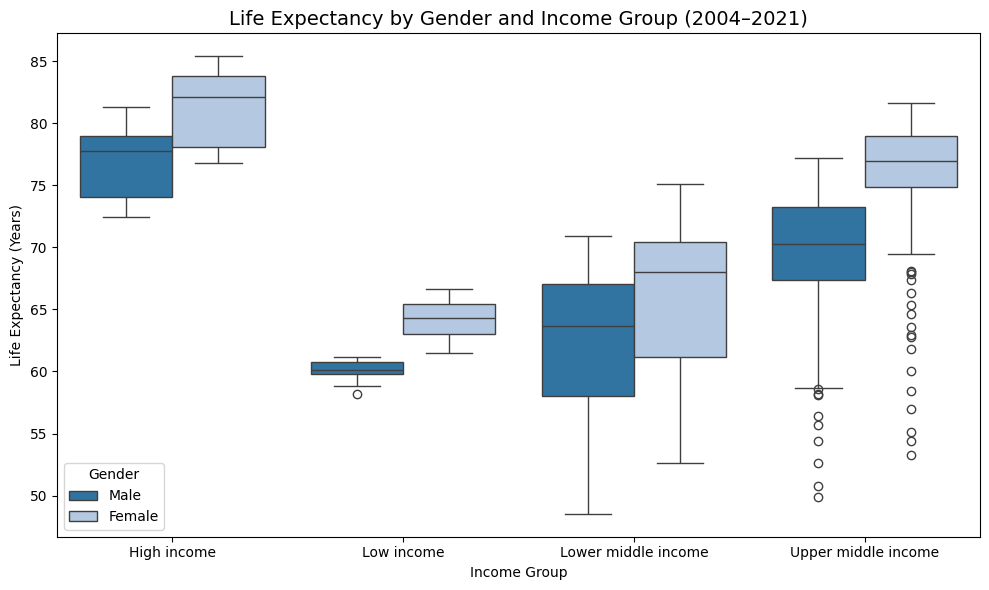

In [19]:
# Melt male and female life expectancy columns into long format
df_income_gender_box = pd.melt(
    df,
    id_vars=[col for col in df.columns if col.startswith('Income Group_')] + ['Year'],
    value_vars=['Life expectancy at birth, male (years)', 'Life expectancy at birth, female (years)'],
    var_name='Gender',
    value_name='Life Expectancy'
)

# Extract gender labels
df_income_gender_box['Gender'] = df_income_gender_box['Gender'].str.extract(r'\b(male|female)\b', expand=False).str.title()

# Melt the income group columns to long format
df_income_gender_box = df_income_gender_box.melt(
    id_vars=['Year', 'Gender', 'Life Expectancy'],
    value_vars=[col for col in df.columns if col.startswith('Income Group_')],
    var_name='Income Group',
    value_name='is_group'
)

# Filter only active income group rows
df_income_gender_box = df_income_gender_box[df_income_gender_box['is_group'] == 1]
df_income_gender_box['Income Group'] = df_income_gender_box['Income Group'].str.replace('Income Group_', '')

# Plot side-by-side boxplots of life expectancy by income group and gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_income_gender_box, x='Income Group', y='Life Expectancy', hue='Gender', palette='tab20')
plt.title("Life Expectancy by Gender and Income Group (2004–2021)", fontsize=14)
plt.xlabel("Income Group")
plt.ylabel("Life Expectancy (Years)")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [20]:
# Create a Gender Gap column: Female - Male life expectancy
df['Gender Gap (Female - Male)'] = df['Life expectancy at birth, female (years)'] - df['Life expectancy at birth, male (years)']

# Display basic statistics for the gender gap
gender_gap_stats = df['Gender Gap (Female - Male)'].describe()

gender_gap_stats

count    2886.000000
mean        5.182380
std         2.125714
min         0.071000
25%         3.762500
50%         4.840000
75%         6.333500
max        13.550000
Name: Gender Gap (Female - Male), dtype: float64

Mean gap: ~5.18 years

Median (50th percentile): ~4.84 years

75th percentile: over 6.3 years

Max gap: 13.55 years — that's a huge disparity in some countries

Min gap: ~0.07 years — very close life expectancy between genders

In [21]:
import plotly.express as px
import pandas as pd

# Calculate average gender gap per country
avg_gender_gap_country = df.groupby('CountryShortName')['Gender Gap (Female - Male)'].mean().reset_index()
avg_gender_gap_country.columns = ['Country', 'Average Gender Gap']

# Create choropleth map
fig = px.choropleth(
    avg_gender_gap_country,
    locations='Country',
    locationmode='country names',
    color='Average Gender Gap',
    color_continuous_scale='rdbu',
    title='Average Gender Gap in Life Expectancy (Female - Male, 2004–2021)',
    labels={'Average Gender Gap': 'Years'}
)

fig.update_geos(showframe=False, showcoastlines=True)
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

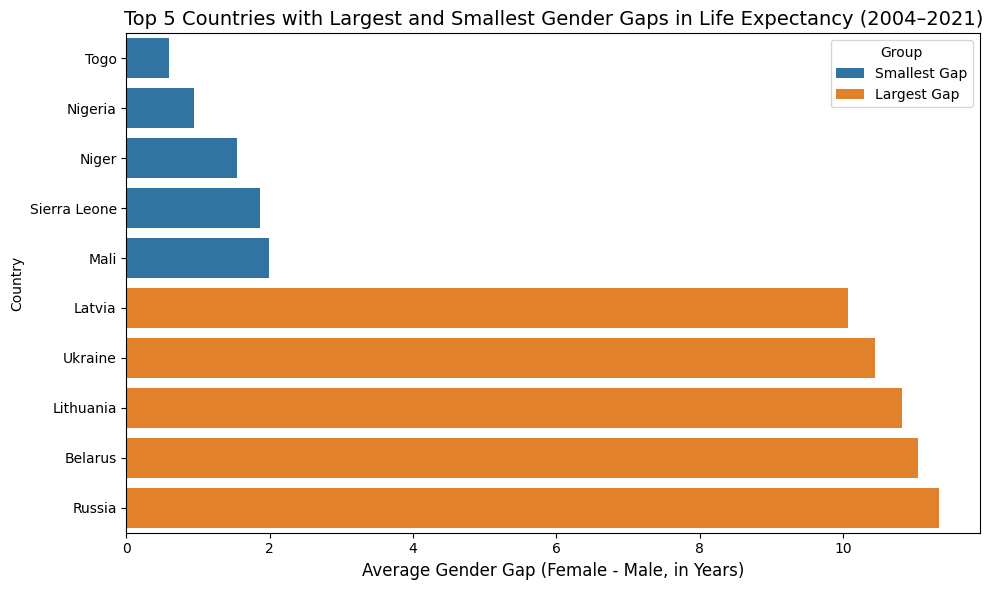

In [22]:
# Calculate average gender gap per country
avg_gender_gap_country = df.groupby('CountryShortName')['Gender Gap (Female - Male)'].mean().sort_values()

# Get bottom 5 and top 5 countries
bottom_5_gap = avg_gender_gap_country.head(5)
top_5_gap = avg_gender_gap_country.tail(5)

# Combine for plotting
gap_bar_df = pd.concat([bottom_5_gap, top_5_gap]).reset_index()
gap_bar_df.columns = ['Country', 'Average Gender Gap']
gap_bar_df['Group'] = ['Smallest Gap'] * 5 + ['Largest Gap'] * 5

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=gap_bar_df, x='Average Gender Gap', y='Country', hue='Group', dodge=False)
plt.title("Top 5 Countries with Largest and Smallest Gender Gaps in Life Expectancy (2004–2021)", fontsize=14)
plt.xlabel("Average Gender Gap (Female - Male, in Years)", fontsize=12)
plt.ylabel("Country")
plt.legend(title="Group")
plt.tight_layout()
plt.show()

#### Calculate standard deviation of life expectancy within each year to see if global inequality is rising/falling.

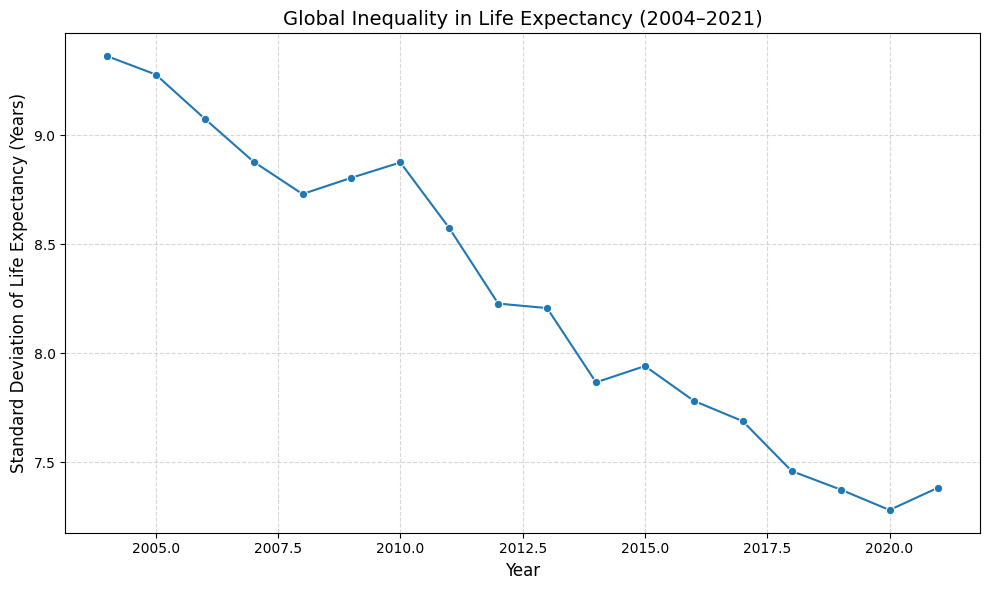

In [23]:
# Calculate standard deviation of life expectancy within each year to assess global inequality
yearly_inequality = df.groupby('Year')['Life expectancy at birth, total (years)'].std().reset_index()

# Plot the standard deviation (inequality) of life expectancy over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_inequality, x='Year', y='Life expectancy at birth, total (years)', marker='o')
plt.title("Global Inequality in Life Expectancy (2004–2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Standard Deviation of Life Expectancy (Years)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Correlation Analysis

In [26]:
# Select the relevant columns for correlation analysis
key_columns = [
    'Life expectancy at birth, total (years)',
    'GDP per capita, PPP (constant 2021 international $)',
    'Income Group_Low income', 
    'Income Group_Lower middle income', 
    'Income Group_Upper middle income', 
    'Income Group_High income',
    'Adjusted savings: education expenditure (% of GNI)',
    'Health/Demographic survey (Availability score over 10 years)',
    'School enrollment, primary (% gross)',
    'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)',
    'Total greenhouse gas emissions including LULUCF (Mt CO2e)',
    'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'
]

# Subset the dataframe for these columns
df_corr = df[key_columns]

# Compute correlation matrix
correlation_matrix = df_corr.corr()

correlation_matrix

Life expectancy at birth, total (years)  \
Life expectancy at birth, total (years)                                            1.000000   
GDP per capita, PPP (constant 2021 internationa...                                 0.235464   
Income Group_Low income                                                           -0.070549   
Income Group_Lower middle income                                                  -0.141738   
Income Group_Upper middle income                                                   0.052562   
Income Group_High income                                                           0.184035   
Adjusted savings: education expenditure (% of GNI)                                 0.630543   
Health/Demographic survey (Availability score o...                                 0.484560   
School enrollment, primary (% gross)                                              -0.120173   
Unemployment, youth total (% of total labor for...                                 0.144772   
Total greenhouse gas emissions including LULUCF...                                -0.059270   
PM2.5 air pollution, mean annual exposure (micr...                                 0.063171   

                                                    GDP per capita, PPP (constant 2021 international $)  \
Life expectancy at birth, total (years)                                                      0.235464     
GDP per capita, PPP (constant 2021 internationa...                                           1.000000     
Income Group_Low income                                                                     -0.027133     
Income Group_Lower middle income                                                            -0.071534     
Income Group_Upper middle income                                                            -0.103724     
Income Group_High income                                                                    -0.077208     
Adjusted savings: education expenditure (% of GNI)                                           0.273120     
Health/Demographic survey (Availability score o...                                           0.223890     
School enrollment, primary (% gross)                                                         0.642963     
Unemployment, youth total (% of total labor for...                                           0.707387     
Total greenhouse gas emissions including LULUCF...                                          -0.007519     
PM2.5 air pollution, mean annual exposure (micr...                                           0.570721     

                                                    Income Group_Low income  \
Life expectancy at birth, total (years)                           -0.070549   
GDP per capita, PPP (constant 2021 internationa...                -0.027133   
Income Group_Low income                                            1.000000   
Income Group_Lower middle income                                  -0.011929   
Income Group_Upper middle income                                  -0.017298   
Income Group_High income                                          -0.012876   
Adjusted savings: education expenditure (% of GNI)                -0.058668   
Health/Demographic survey (Availability score o...                 0.002832   
School enrollment, primary (% gross)                              -0.028106   
Unemployment, youth total (% of total labor for...                 0.021517   
Total greenhouse gas emissions including LULUCF...                 0.001068   
PM2.5 air pollution, mean annual exposure (micr...                -0.013033   

                                                    Income Group_Lower middle income  \
Life expectancy at birth, total (years)                                    -0.141738   
GDP per capita, PPP (constant 2021 internationa...                         -0.071534   
Income Group_Low income                                                    -0.011929   
Income Group_Lower middle income            

In [33]:
# Calculate the correlation matrix for all numeric variables
df_numeric = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numeric.corr()

# Create a list to store the most positively and negatively correlated pairs
positive_corr = []
negative_corr = []

# Iterate through the correlation matrix to identify the most positive and negative correlations
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.7:  # Strong positive correlation threshold
            positive_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))
        elif correlation_matrix.iloc[i, j] < -0.7:  # Strong negative correlation threshold
            negative_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Sort the results based on correlation values
positive_corr = sorted(positive_corr, key=lambda x: x[2], reverse=True)
negative_corr = sorted(negative_corr, key=lambda x: x[2])

# Display the results
positive_corr[:10], negative_corr[:10]  # Top 10 most positively and negatively correlated pairs

([('Population ages 0-14, total',
   'Population ages 0-14, male',
   0.9999786214844144),
  ('Population ages 0-14, total',
   'Population ages 0-14, female',
   0.9999769243508747),
  ('Population ages 0-14, male',
   'Population ages 0-14, female',
   0.9999111252766126),
  ('Population ages 0-14, male (% of male population)',
   'Population ages 0-14, female (% of female population)',
   0.9998781245674598),
  ('Population ages 0-14, male (% of male population)',
   'Population ages 0-14 (% of total population)',
   0.9998595158665086),
  ('GDP per capita, PPP (current international $)',
   'GNI per capita, PPP (current international $)',
   0.9998174690799971),
  ('GDP per capita growth (annual %)',
   'Adjusted savings: carbon dioxide damage (% of GNI)',
   0.9998137538170743),
  ('GDP (current US$)', 'GNI (current US$)', 0.999780642959431),
  ('Population ages 0-14, female (% of female population)',
   'Population ages 0-14 (% of total population)',
   0.9994759773994875),
  ('G